# 神经网络分类器

1797


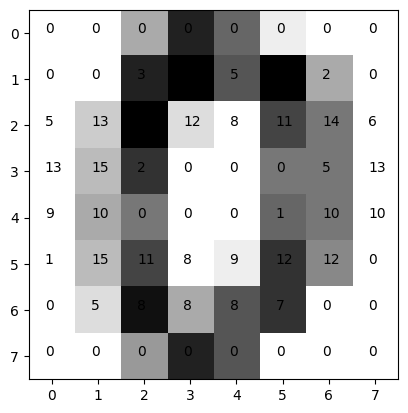

In [2]:
# pip install scikit-learn
from sklearn import datasets

digits = datasets.load_digits()

digits.images[0]
print(len(digits.images))

import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r) # 将灰度图显示出来
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15,j,int(digits.images[0][i][j])) # 显示对应的灰度值

In [3]:
import numpy as np

# 产生一个10维的随机结果
def random_classifier(input_vector):
    return np.random.rand(10)

In [55]:
# 测试分类器的表现

def test_digit_classify(classifier, start=0, test_count=1000):
    correct = 0
    end = start + test_count
    for img, target in zip(digits.images[start:end], digits.target[start:end]):
        v = np.matrix.flatten(img) / 15.0
        output = classifier(v)
        answer = list(output).index(max(output))
        if answer == target:
            correct += 1
    return correct / test_count

test_digit_classify(random_classifier) # 这个随机的分类器成功率在10%左右

# 作者有很明显的测试驱动开发的倾向，都是先介绍评价和测试方法，然后一步步完善功能

0.101

In [47]:
# 用平均值取代最大值

# 计算图像的平均值
def average_img(i):
    imgs = [img for img, target in zip(digits.images[1000:], digits.target[1000:]) if target == i]
    return sum(imgs) / len(imgs)

avg_digits = [np.matrix.flatten(average_img(i)) for i in range(10)]

def compare_to_avg(v):
    return [np.dot(v, avg_digits[i]) for i in range(10)]

test_digit_classify(compare_to_avg)

0.853

In [48]:
# 使用scikit-learn进行自动训练
from sklearn.neural_network import MLPClassifier
import numpy as np


x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]])
y = digits.target[:1000]

mlp = MLPClassifier(
    hidden_layer_sizes=(16,),
    activation='logistic',
    max_iter=100,
    verbose=10,
    random_state=1,
    learning_rate_init=0.1
)

mlp.fit(x, y)
# 训练模型完毕

Iteration 1, loss = 2.23866635
Iteration 2, loss = 1.77438032
Iteration 3, loss = 1.41744858
Iteration 4, loss = 1.10850064
Iteration 5, loss = 0.88313506
Iteration 6, loss = 0.77476369
Iteration 7, loss = 0.63336397
Iteration 8, loss = 0.53837653
Iteration 9, loss = 0.51954118
Iteration 10, loss = 0.45632287
Iteration 11, loss = 0.46623044
Iteration 12, loss = 0.42578942
Iteration 13, loss = 0.40520821
Iteration 14, loss = 0.41714433
Iteration 15, loss = 0.39587728
Iteration 16, loss = 0.36670745
Iteration 17, loss = 0.33076558
Iteration 18, loss = 0.27120191
Iteration 19, loss = 0.27076003
Iteration 20, loss = 0.27453754
Iteration 21, loss = 0.25062148
Iteration 22, loss = 0.24052226
Iteration 23, loss = 0.24145593
Iteration 24, loss = 0.24648642
Iteration 25, loss = 0.24676136
Iteration 26, loss = 0.26465972
Iteration 27, loss = 0.25571450
Iteration 28, loss = 0.34484054
Iteration 29, loss = 0.29028155
Iteration 30, loss = 0.31202279
Iteration 31, loss = 0.28848171
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(16,),
              learning_rate_init=0.1, max_iter=100, random_state=1, verbose=10)

In [53]:
for i in range(10):
    answer = mlp.predict_proba([x[i]])[0]
    print(list(answer).index(max(answer)), digits.target[i]) # 训练集中的第一个结果

def sklearn_trained_classify(v):
    return mlp.predict_proba([v])[0]

test_digit_classify(sklearn_trained_classify) # 准确度在93.1%

0 0
1 1
2 2
3 3
4 4
3 5
6 6
7 7
8 8
9 9


0.931

In [57]:
# 测试其余项目
test_digit_classify(sklearn_trained_classify, start=1000, test_count=500)

0.89